<a href="https://colab.research.google.com/github/mqduan/Machine-Learning-implementation/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Brief Introduction
Logistic regression is a type of generalized linear models. It is used to model count or proportion data or binary classification data. The model is fit as
\begin{equation}
 \log {\frac{p}{1-p}} = βx,    
\end{equation}or
\begin{equation}
p = \frac{1}{1 + e^{-\beta x}}
 \end{equation}

## Loss function
Since the model assumes that the samples are independent and their labels/classes follow a sequence of bernoulli distributions, maximum likelihood estimators are usually used to fit the model, where we maximize the conditional probability of observing the data given a specific parameter $\beta$ . The log likelihood is 
\begin{equation}
l(\beta) = \sum_{i=1}^{N} {\log {P(y_i  |X=x_i;\beta)}}
\end{equation}  

If we denote 
$ P(Y=1|X=x)=p(x;\beta) $ and $ P(Y=0 |X=x) = 1-p(x; \beta) $ , then


\begin{eqnarray*}
l(\beta)&=&\sum { [y_i \log {p(x_i;\beta)}+(1-y_i)}\log {(1-p(x_i;\beta)]}\\
&=&\sum(y_i\beta^T x_i-\log (1+e^{\beta^T x_i}))
\end{eqnarray*}

The negative of the binomial log likelihood is also half of the deviance between an observed probability $y_i$ (in this case, 0/1)and its estimate $p(x_i, \beta)$, where the deviance (which is twice the 'Kullback-Leibler distance') is given as :
\begin{equation}
D=2\sum[y_i\log(\frac{y_i}{p(x_i, \beta)})+(1-y_i)\log(\frac{1-y_i}{1-p(x_i, \beta)})]
\end{equation}
To maximize the log likelihood is then equavalent to minimising the deviance as a measure just like the quared error in regression.

## Regularizations
A modified version of negative log likelihood function is called the log loss and with regularization term, it is given as:
\begin{equation}
f(\beta)=\frac{1}{N}\sum_{i=1}^N {[-y_i \beta^T x_i +\log(1+e^{\beta^T x_i})]}+\frac{\lambda}{2} ||\beta||^2
\end{equation}
and its gradient is given as:
\begin{equation}
\frac{\partial f(\beta)}{\partial \beta_i}=\frac{1}{N}\sum_{i=1}^N (-y_ix_i+p(x_i;\beta)x_i)+\lambda \beta
\end{equation}
Through iterations of gradient descent, the log loss should decrease. As a way of sanity check, the log loss should be smaller than $-\log(0.5)=0.693$ to beat the random toss of a coin to assign classes.

Alternatively, one could also consider an L1 penalty as the regularization term.
\begin{equation}
f(\beta)=\frac{1}{N}\sum_{i=1}^N {[-y_i \log \hat p_i -(1-y_i) \log(1-\hat p_i))]}+\lambda ||\beta||_1
\end{equation} where
\begin{equation}
\hat p_i= \frac{1}{1+e^{-\beta^Tx_i}}
\end{equation}
The subgradient of this loss function is
\begin{equation}
\frac{1}{N}\langle x_i,(y-\hat p)\rangle-\lambda s_i
\end{equation} where 
\begin{equation}
s_i \in sign(\beta_i)
\end{equation}



## An analysis of the loan prediction.
The data is from [here](https://www.kaggle.com/itssuru/loan-data?select=loan_data.csv) which is "publicly available data from LendingClub".com. The columns in this data file include the following.

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan_data.csv')

In [ ]:
print(f'This dataset contains {df.shape[0]} data points with {df.shape[1]} features.')

This dataset contains 9578 data points with 14 features.


In [ ]:
response=df['not.fully.paid']
print(f'There are {response.value_counts()[0]} who paid off loan in full,')
print(f'and {response.value_counts()[1]} defaulted.')

There are 8045 who paid off loan in full,
and 1533 defaulted.


In [ ]:
print(f'There is missing values: \n {df.isnull().sum()!=0}') 

There is missing values: 
 credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.columns[:-1]

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

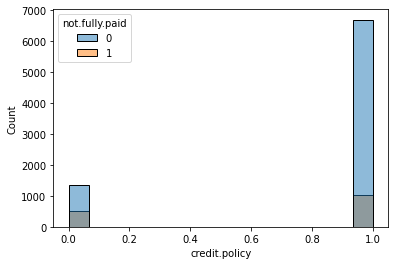

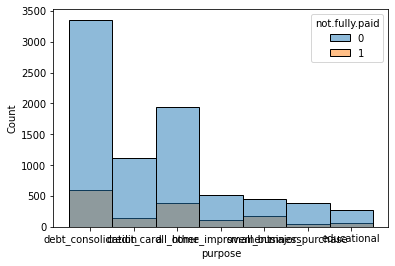

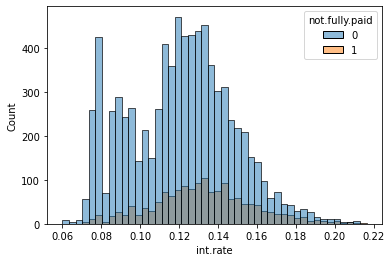

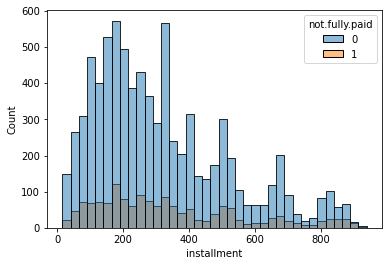

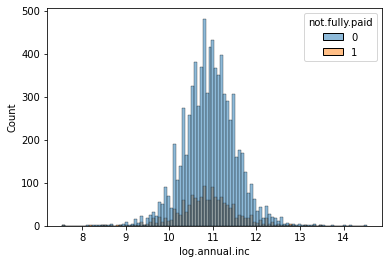

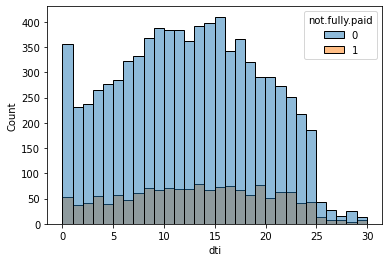

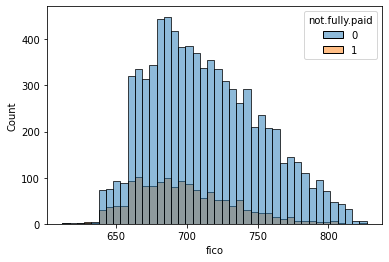

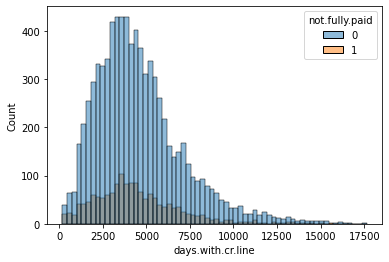

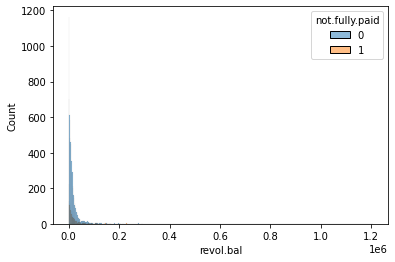

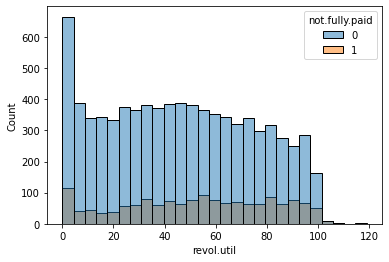

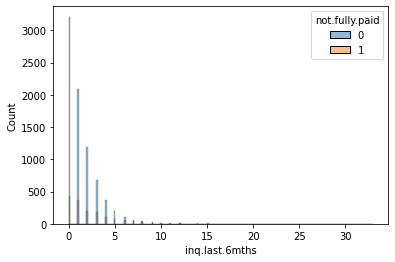

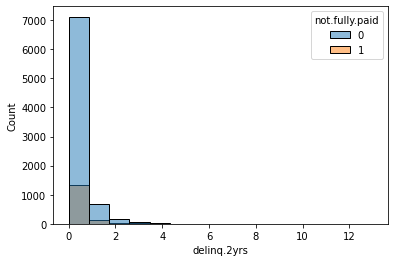

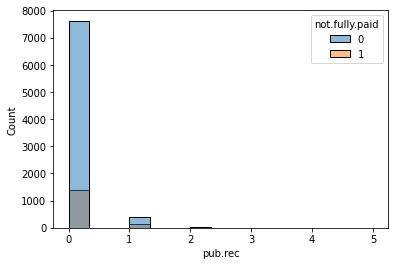

In [ ]:
#numerical_feat = df.dtypes[df.dtypes != 'object'].index
# plot all predictor columns color coded by the response.
for f in df.columns[:-1]:
    sns.histplot(data=df, x=f,hue='not.fully.paid')
    plt.show()


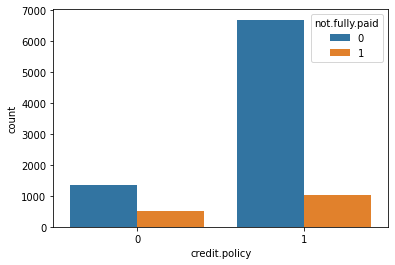

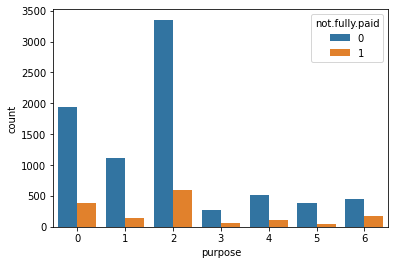

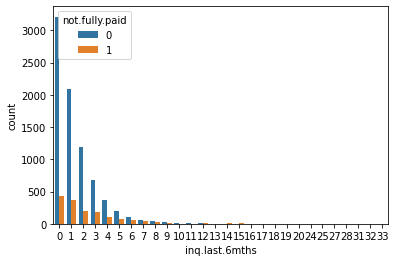

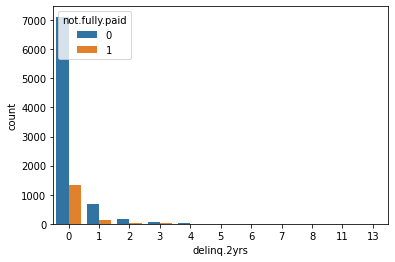

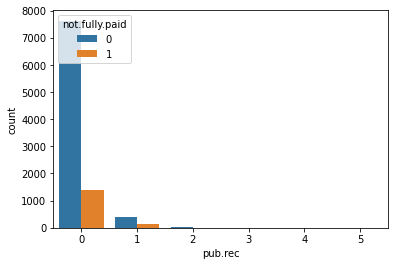

In [ ]:
df['purpose']=df['purpose'].astype('category').cat.codes
categorical_feat=['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
for f in categorical_feat:
    sns.countplot(data=df, x=f,hue='not.fully.paid')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X,y=df.drop('not.fully.paid',axis=1),df['not.fully.paid']
X=pd.get_dummies(X,drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=49)
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=49)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
#X_val = scale.transform(X_val)
X_test = scale.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,log_loss
from sklearn.model_selection import GridSearchCV, StratifiedKFold
C_list=np.geomspace(1e-5,1e5,20) # Return numbers spaced evenly on a log scale
weight_list = np.linspace (0, 0.5, 10)
print(C_list, weight_list)

gridsearch = GridSearchCV(
    LogisticRegression(penalty='l1',solver='saga'), #Tried l1 penalty with considerably longer run time with not much difference
    #LogisticRegression(),
    param_grid ={'C': C_list, 'class_weight': [{0:x,1:1.0-x} for x in weight_list]},
    cv=StratifiedKFold(),
    scoring='f1',
    verbose=2).fit(X_train,y_train)


[1.00000000e-05 3.35981829e-05 1.12883789e-04 3.79269019e-04
 1.27427499e-03 4.28133240e-03 1.43844989e-02 4.83293024e-02
 1.62377674e-01 5.45559478e-01 1.83298071e+00 6.15848211e+00
 2.06913808e+01 6.95192796e+01 2.33572147e+02 7.84759970e+02
 2.63665090e+03 8.85866790e+03 2.97635144e+04 1.00000000e+05] [0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5       ]
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END .............C=1e-05, class_weight={0: 0.0, 1: 1.0}; total time=   0.0s
[CV] END .............C=1e-05, class_weight={0: 0.0, 1: 1.0}; total time=   0.0s
[CV] END .............C=1e-05, class_weight={0: 0.0, 1: 1.0}; total time=   0.0s
[CV] END .............C=1e-05, class_weight={0: 0.0, 1: 1.0}; total time=   0.0s
[CV] END .............C=1e-05, class_weight={0: 0.0, 1: 1.0}; total time=   0.0s
[CV] END C=1e-05, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.0s
[CV] END C=1e

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=0.5455594781168515, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=0.5455594781168515, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=0.5455594781168515, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=0.5455594781168515, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=0.5455594781168515, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END C=0.5455594781168515, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=0.5455594781168515, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=0.5455594781168515, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=0.5455594781168515, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=0.5455594781168515, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=0.5455594781168515, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=0.5455594781168515, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.3s
[CV] END C=0.5455594781168515, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=0.5455594781168

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.8329807108324339, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.8329807108324339, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.8329807108324339, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.8329807108324339, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.8329807108324339, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END C=1.8329807108324339, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.8329807108324339, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=1.8329807108324339, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=1.8329807108324339, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=1.8329807108324339, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=1.8329807108324339, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=1.8329807108324339, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=1.8329807108324339, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=1.8329807108324339, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=1.8329807108324339, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=6.1584821106602545, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=6.1584821106602545, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=6.1584821106602545, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=6.1584821106602545, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=6.1584821106602545, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END C=6.1584821106602545, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=6.1584821106602545, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=6.1584821106602545, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=6.1584821106602545, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=6.1584821106602545, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=6.1584821106602545, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.3s
[CV] END C=6.1584821106602545, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=6.1584821106602545, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=6.1584821106602545, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=6.1584821106602545, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..C=20.6913808111479, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..C=20.6913808111479, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..C=20.6913808111479, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..C=20.6913808111479, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..C=20.6913808111479, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=20.6913808111479, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=20.6913808111479, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=20.6913808111479, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=20.6913808111479, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=20.6913808111479, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=20.6913808111479, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=20.6913808111479, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=20.6913808111479, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=20.6913808111479, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=20.6913808111479, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=20.6

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=69.51927961775606, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=69.51927961775606, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=69.51927961775606, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=69.51927961775606, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=69.51927961775606, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=69.51927961775606, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=69.51927961775606, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=69.51927961775606, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=69.51927961775606, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=69.51927961775606, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=69.51927961775606, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=69.51927961775606, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=69.51927961775606, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=69.51927961775606, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=69.51927961775606, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=233.57214690901213, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=233.57214690901213, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=233.57214690901213, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=233.57214690901213, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=233.57214690901213, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END C=233.57214690901213, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=233.57214690901213, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=233.57214690901213, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=233.57214690901213, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=233.57214690901213, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=233.57214690901213, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.5s
[CV] END C=233.57214690901213, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.4s
[CV] END C=233.57214690901213, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=233.57214690901213, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=233.57214690901213, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=784.7599703514607, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=784.7599703514607, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=784.7599703514607, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=784.7599703514607, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=784.7599703514607, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=784.7599703514607, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=784.7599703514607, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=784.7599703514607, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=784.7599703514607, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=784.7599703514607, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=784.7599703514607, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=784.7599703514607, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=784.7599703514607, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=784.7599703514607, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=784.7599703514607, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2636.6508987303555, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2636.6508987303555, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2636.6508987303555, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2636.6508987303555, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2636.6508987303555, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2636.6508987303555, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2636.6508987303555, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=2636.6508987303555, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=2636.6508987303555, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=2636.6508987303555, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=2636.6508987303555, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=2636.6508987303555, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=2636.6508987303555, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=2636.6508987303555, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=2636.6508987303555, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=8858.667904100832, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=8858.667904100832, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=8858.667904100832, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=8858.667904100832, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=8858.667904100832, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=8858.667904100832, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=8858.667904100832, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=8858.667904100832, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=8858.667904100832, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=8858.667904100832, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=8858.667904100832, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=8858.667904100832, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=8858.667904100832, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=8858.667904100832, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=8858.667904100832, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=29763.51441631313, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=29763.51441631313, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=29763.51441631313, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=29763.51441631313, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .C=29763.51441631313, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END C=29763.51441631313, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=29763.51441631313, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=29763.51441631313, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=29763.51441631313, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=29763.51441631313, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=29763.51441631313, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=29763.51441631313, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=29763.51441631313, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=29763.51441631313, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=29763.51441631313, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..........C=100000.0, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..........C=100000.0, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..........C=100000.0, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..........C=100000.0, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..........C=100000.0, class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END C=100000.0, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=100000.0, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=100000.0, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.2s
[CV] END C=100000.0, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=100000.0, class_weight={0: 0.05555555555555555, 1: 0.9444444444444444}; total time=   0.3s
[CV] END C=100000.0, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.3s
[CV] END C=100000.0, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=100000.0, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.1s
[CV] END C=100000.0, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=100000.0, class_weight={0: 0.1111111111111111, 1: 0.8888888888888888}; total time=   0.2s
[CV] END C=100000.0, class_weight={0: 0.16666666666666666, 1: 0.8333333333333334}; tota

In [ ]:
CV_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'],'param': gridsearch.cv_results_['params']})
CV_data = CV_data.sort_values('score',ascending=False)
print(f'Best f1 score for class 1 is {CV_data.iloc[0][0]:.2f}')
print(f'Best hypterparameters are {CV_data.iloc[0][1]}')

Best f1 score for class 1 is 0.35
Best hypterparameters are {'C': 0.5455594781168515, 'class_weight': {0: 0.16666666666666666, 1: 0.8333333333333334}}


In [ ]:
final_lr_model = gridsearch.best_estimator_
final_lr_model.get_params()
train_pred = final_lr_model.predict(X_train)
y_pred = final_lr_model.predict(X_test)
# compare performance on train data and val data, no overfitting found.
print(classification_report(train_pred,y_train))
print(classification_report(y_pred,y_test))
print('Training set confusion matrix:')
print(confusion_matrix(y_train,train_pred))
print('Testing set confusion matrix:')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77      5487
           1       0.57      0.25      0.35      3133

    accuracy                           0.66      8620
   macro avg       0.62      0.57      0.56      8620
weighted avg       0.64      0.66      0.62      8620

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       626
           1       0.55      0.23      0.33       332

    accuracy                           0.67       958
   macro avg       0.62      0.57      0.55       958
weighted avg       0.64      0.67      0.62       958

Training set confusion matrix:
[[4892 2337]
 [ 595  796]]
Testing set confusion matrix:
[[562 254]
 [ 64  78]]


In [ ]:
lr_coef=pd.DataFrame(final_lr_model.coef_, columns=X.columns)

In [ ]:
lr_coef.T

,0
credit.policy,-0.117425
int.rate,0.063172
installment,0.234738
log.annual.inc,-0.255390
dti,-0.022572
fico,-0.341067
days.with.cr.line,0.046676
revol.bal,0.109244
revol.util,0.075585
inq.last.6mths,0.238005


In [128]:
renamed_df=df.rename(columns={'credit.policy':'policy','int.rate':'int_rate', 'log.annual.inc':'log_income','days.with.cr.line':'days_with_cr_line',
                   'revol.bal':'revol_bal','revol.util': 'revol_util','inq.last.6mths': 'inq', 'delinq.2yrs': 'delinq','pub.rec': 'pub_rec',
                   'not.fully.paid': 'not_fully_paid'})

In [218]:
# Fit logistic model using statsmodels
from statsmodels.formula.api import logit

loan_mod = logit(
    'not_fully_paid ~ policy +purpose +int_rate +installment +log_income +dti+fico+days_with_cr_line+revol_bal+revol_util+inq+delinq+pub_rec',
     renamed_df
).fit()

Optimization terminated successfully.
         Current function value: 0.409930
         Iterations 6


In [219]:
print(loan_mod.summary())

                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 9578
Model:                          Logit   Df Residuals:                     9559
Method:                           MLE   Df Model:                           18
Date:                Thu, 10 Mar 2022   Pseudo R-squ.:                 0.06783
Time:                        23:59:13   Log-Likelihood:                -3926.3
converged:                       True   LL-Null:                       -4212.0
Covariance Type:            nonrobust   LLR p-value:                9.357e-110
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         8.5885      1.290      6.657      0.000       6.060      11.117
purpose[T.credit_card]           -0.5321      0.109     -4.871      0.000 

In [220]:
loan_mod.pred_table()

array([[8000.,   45.],
       [1485.,   48.]])

In [226]:
# By changing the threshold, we can find the best tradeoff between specificivity and sensitivity.
pred = np.array(loan_mod_glm.predict(renamed_df.iloc[:,:-1]) > 0.18, dtype=float)
table = np.histogram2d(renamed_df.iloc[:,-1], pred, bins=2)[0]
print(table)

[[5851. 2194.]
 [ 746.  787.]]


In [139]:
mfx = loan_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:         not_fully_paid
Method:                          dydx
At:                           overall
                                   dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
purpose[T.credit_card]           -0.0668      0.014     -4.878      0.000      -0.094      -0.040
purpose[T.debt_consolidation]    -0.0424      0.010     -4.368      0.000      -0.061      -0.023
purpose[T.educational]            0.0085      0.019      0.448      0.654      -0.029       0.046
purpose[T.home_improvement]       0.0117      0.016      0.737      0.461      -0.019       0.043
purpose[T.major_purchase]        -0.0444      0.021     -2.126      0.033      -0.085      -0.003
purpose[T.small_business]         0.0675      0.015      4.610      0.000       0.039       0.096
policy                           -0.0413      0.011     -3.913  

In [229]:
# Fit logistic model using statsmodels glm (same model)
from statsmodels.formula.api import glm
import statsmodels.api as sm

loan_mod_glm = glm(
    'not_fully_paid ~ policy +purpose +int_rate +installment +log_income +dti+fico+days_with_cr_line+revol_bal+revol_util+inq+delinq+pub_rec',
     renamed_df, family=sm.families.Binomial(),
).fit()
print(loan_mod_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         not_fully_paid   No. Observations:                 9578
Model:                            GLM   Df Residuals:                     9559
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3926.3
Date:                Fri, 11 Mar 2022   Deviance:                       7852.6
Time:                        00:05:20   Pearson chi2:                 9.39e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Reference
1. [Computer Age Statistical Inference, Algorithms, Evidence, and Data Science by Bradley Efron and Trevor Hastie.2016](https://hastie.su.domains/CASI/)
2. [The Elements of Statistical Learning, Data Mining, Inference, and Prediction by Trevor Hastie, Robert Tibshirani, Jerome Friedman 2017 ](https://hastie.su.domains/Papers/ESLII.pdf)
3. Data from https://www.kaggle.com/itssuru/loan-data?select=loan_data.csv